In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as ply

In [153]:
a =np.array([[1,2,3],[3,5,1],[2,1,3]]).reshape((1,3,3,1))
b =np.array([[1,2,3,4],[3,5,1,2],[2,1,3,1], [3,4,5,6]]).reshape((1,4,4,1))
c =np.array([[1,2,3,4,5],[3,5,1,2,5],[2,1,3,1,6], [3,4,5,6,1], [3,1,4,2,4]]).reshape((1,5,5,1))
d =np.array([[1,2,3,4,5,6,7],[3,5,1,2,5,2,5],[2,1,3,1,6,3,5], [3,4,5,6,1,1,3], [3,1,4,2,4,5,1], [2,4,5,1,6,7,2], [2,4,5,1,6,7,2]]).reshape((1,7,7,1))
type(a)

numpy.ndarray

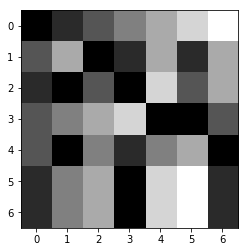

In [173]:
ply.imshow(np.squeeze(d), cmap='gray')
ply.show()

In [155]:
kernel_dim = 3
kernel =  np.random.random((kernel_dim, kernel_dim, 1, 1)).astype(np.float32)

In [174]:
input_ = tf.placeholder(tf.float32, shape =[1,7,7,1], name ='input_')
conv_a = tf.layers.conv2d(input_, 1, 3, 2, padding='same')
deconv_a = tf.layers.conv2d_transpose(conv_a, 1, 1, 1, padding='SAME')
dilatedconv_a = tf.nn.atrous_conv2d(input_, kernel, rate=2,  padding = 'VALID')

In [175]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
conv_a_eval, deconv_a_eval, dilatedconv_a_eval = sess.run([conv_a, deconv_a, dilatedconv_a], feed_dict={input_:d})
# print(conv_a_eval)
# print(deconv_a_eval)
print(conv_a)
print(deconv_a)
print(dilatedconv_a_eval)

Tensor("conv2d_69/BiasAdd:0", shape=(1, 4, 4, 1), dtype=float32)
Tensor("conv2d_transpose_69/BiasAdd:0", shape=(1, 4, 4, 1), dtype=float32)
[[[[ 16.20954132]
   [ 13.8498745 ]
   [ 20.79474068]]

  [[ 16.71504021]
   [ 17.46207428]
   [ 16.77530861]]

  [[ 18.25014305]
   [ 13.79406261]
   [ 18.22554398]]]]


In [15]:
sess.close()

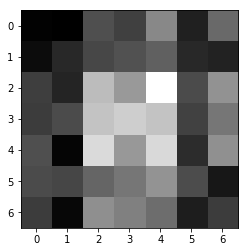

In [172]:
ply.imshow(np.squeeze(dilatedconv_a_eval), cmap='gray')
ply.show()

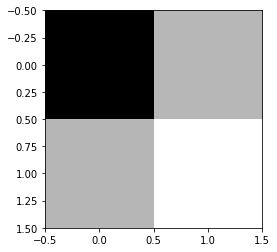

In [117]:
# convolved image
ply.imshow(np.squeeze(conv_a_eval), cmap='gray')
ply.show()

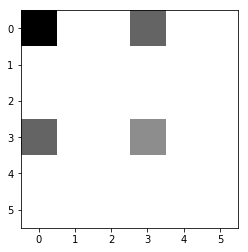

In [118]:
# convolution transpose operation
ply.imshow(np.squeeze(deconv_a_eval),cmap='gray')
ply.show()